In [1]:
import math, cmath
def q(z,w):
    if abs(z*(z-1)*(z-w)) < 0.001:
        return 0
    else:
        return (1/(z*(z-1)*(z-w)))*(abs((z*(z-1)*(z-w))))
# def q(z,w):
#     if abs((1-z)*(1-z*w)) < 0.001:
#         return 0
#     else:
#         return (z**3/((1-z)*(1-w*z)))*(abs(((1-z)*(1-w*z))/z**3))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_trajectory(ax, pos,
                    w, hv, 
                    repeat, old_slope, 
                    x_min = -2, x_max = 2, 
                    rotate = 1, 
                    step = 0.005, max_repeat = 2000):
    
    z = complex(pos[0],pos[1])
    if abs(q(z,w))<0.001:
        return
    elif hv == 0:#horizontal 
        direction = cmath.sqrt(1/q(z,w))
        cl = 'green'
    elif hv == 1:#vertical
        direction = cmath.sqrt(-1/q(z,w))
        cl = 'red'
    slope = direction*step*rotate
    # we have to take the last direction into account i.e. quadratic differentials determine directions up to \pi (not 2\pi).
    if abs(old_slope.real) < abs(old_slope.imag):
        if old_slope.imag * slope.imag <0:
            slope = - slope
    elif old_slope.real * slope.real <0:
        slope = - slope
    # using the slopes to get next position
    x_new = pos[0]+slope.real
    y_new = pos[1]+slope.imag
    if max(x_new, y_new) > x_max or min(x_new, y_new) < x_min or repeat > max_repeat:
        return ax
    # plot the line
    ax.plot([pos[0], x_new], [pos[1], y_new], color=cl, lw = 2)
    #repeat
    draw_trajectory(ax, [x_new,y_new], w, hv, repeat +1, slope, rotate = rotate)
    # at the very first step we also go to the oppposite direction(minus of the slope).
    if repeat ==0:
        draw_trajectory(ax, [x_new,y_new], w, hv, repeat +1, -slope, rotate = rotate)
    


def plot_teich(w, x_min = -2, x_max = 2, step = 0.1, rotate = 1):
    x = y = np.arange(x_min, x_max, step)
    u = np.zeros((len(x),len(x)))
    v = np.zeros((len(x),len(x)))
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    for i in range(3):
        axes[i].plot(0,0,marker='.',markersize=20)
        axes[i].plot(1,0,marker='.',markersize=20)
        axes[i].plot(w.real,w.imag,marker='.',markersize=20)
    for xx in range(len(x)):
        for yy in range(len(y)):
            z = complex(x[xx],y[yy])
            if abs(q(z,w)) < 0.001:
                h_direction = v_direction = 0
            else: 
                h_direction = cmath.sqrt(1/q(z,w))
                v_direction = cmath.sqrt(-1/q(z,w))
            factor = 3
            h_s = h_direction*step/factor*rotate
            v_s = v_direction*step/factor*rotate
            # draw "flow lines".
            axes[0].plot([x[xx]-h_s.real, x[xx]+h_s.real], [y[yy] - h_s.imag, y[yy] +h_s.imag],color='green', lw = 1)
            axes[1].plot([x[xx]-v_s.real, x[xx]+v_s.real], [y[yy] - v_s.imag, y[yy] +v_s.imag],color='red', lw = 1)
            #axes[2].plot([x[xx]-h_s.real, x[xx]+h_s.real], [y[yy] - h_s.imag, y[yy] +h_s.imag],color='green', lw = 1)
            #axes[2].plot([x[xx]-v_s.real, x[xx]+v_s.real], [y[yy] - v_s.imag, y[yy] +v_s.imag],color='red', lw = 1)
    #draw trajectories.
    draw_trajectory(axes[0], [-1.2,0], w, 0, 0, 0, rotate = rotate)
    draw_trajectory(axes[0], [-0.5,0], w, 0, 0, 0, rotate = rotate)     
    draw_trajectory(axes[0], [0.5,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[0], [0.7,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[0], [0.9,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[0], [1.2,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[1], [-1.2,0], w, 1, 0, 0, rotate = rotate)
    draw_trajectory(axes[1], [-0.7,0], w, 1, 0, 0, rotate = rotate)
    draw_trajectory(axes[1], [-0.5,0], w, 1, 0, 0, rotate = rotate)
    draw_trajectory(axes[1], [0.5,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[1], [0.7,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[1], [0.9,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[1], [1.2,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [-1.2,0], w, 0, 0, 0, rotate = rotate)
    draw_trajectory(axes[2], [-0.5,0], w, 0, 0, 0, rotate = rotate)     
    draw_trajectory(axes[2], [0.5,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [0.7,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [0.9,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [1.2,0], w, 0, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [-1.2,0], w, 1, 0, 0, rotate = rotate)
    draw_trajectory(axes[2], [-0.7,0], w, 1, 0, 0, rotate = rotate)
    draw_trajectory(axes[2], [-0.5,0], w, 1, 0, 0, rotate = rotate)
    draw_trajectory(axes[2], [0.5,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [0.7,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [0.9,0], w, 1, 0, 0, rotate = rotate) 
    draw_trajectory(axes[2], [1.2,0], w, 1, 0, 0, rotate = rotate) 
    plt.show()

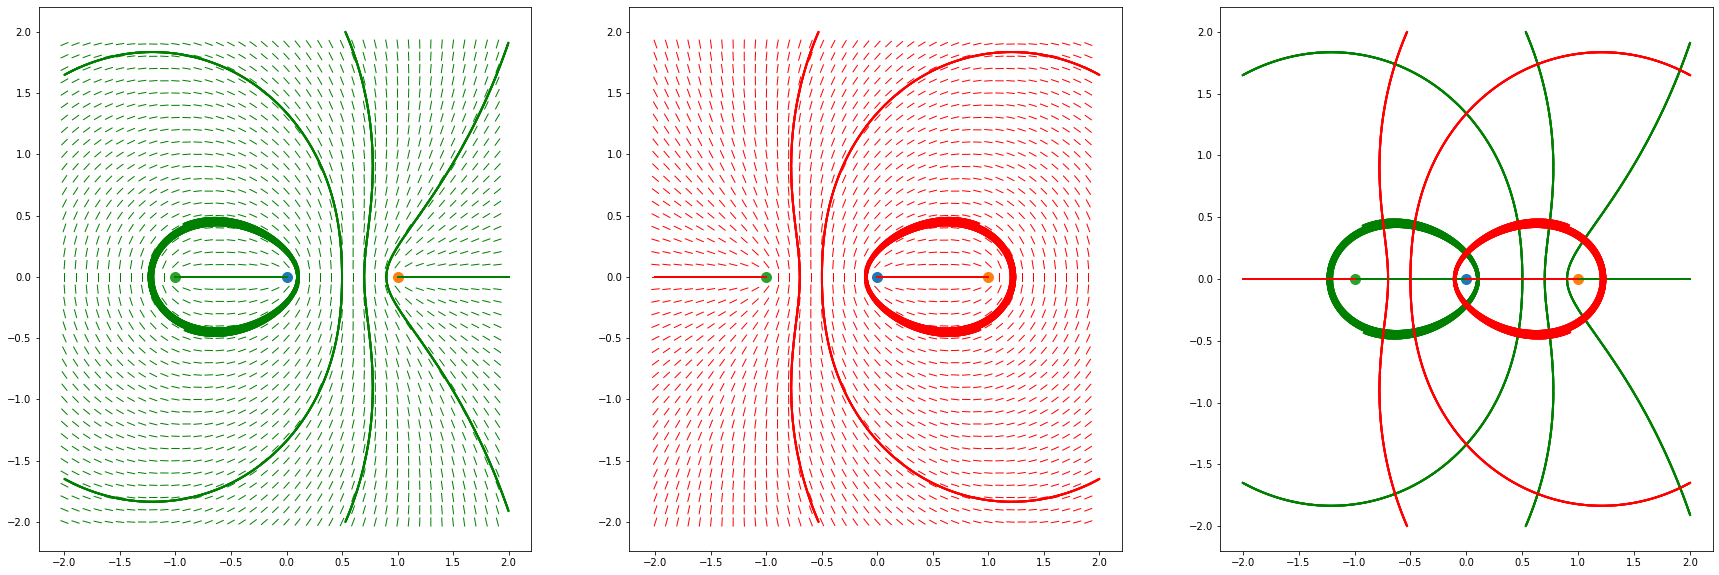

In [4]:
plot_teich(-1)

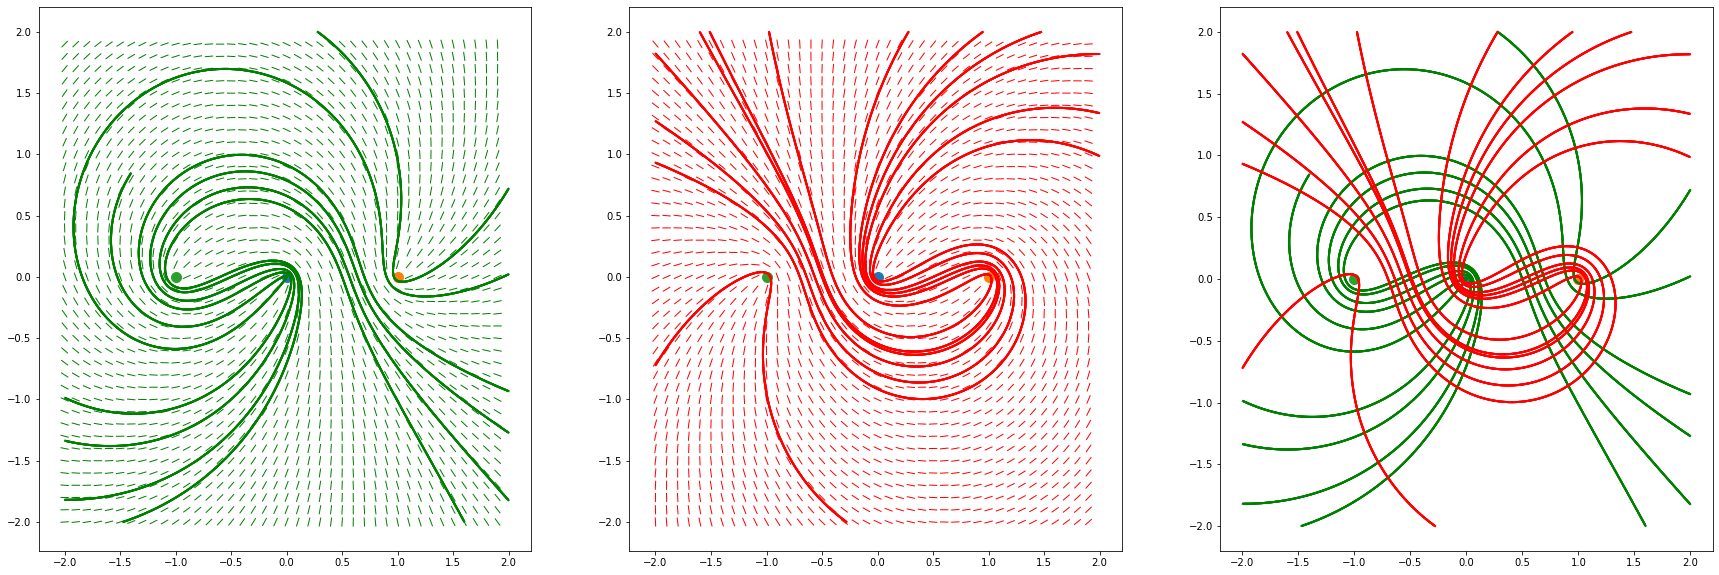

In [37]:
plot_teich(-1, rotate = cmath.exp(complex(0,math.pi*0.123)))

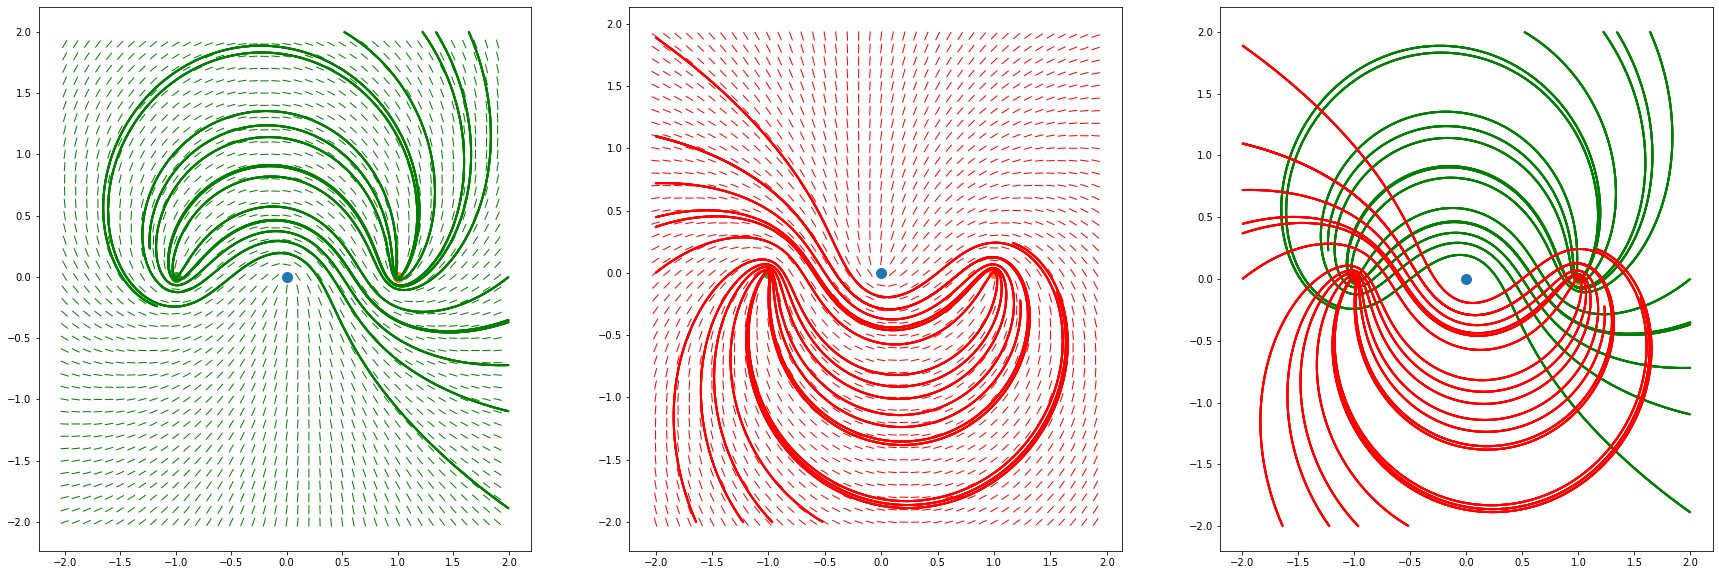

In [38]:
plot_teich(-1, rotate = cmath.exp(complex(0,math.pi/5)))

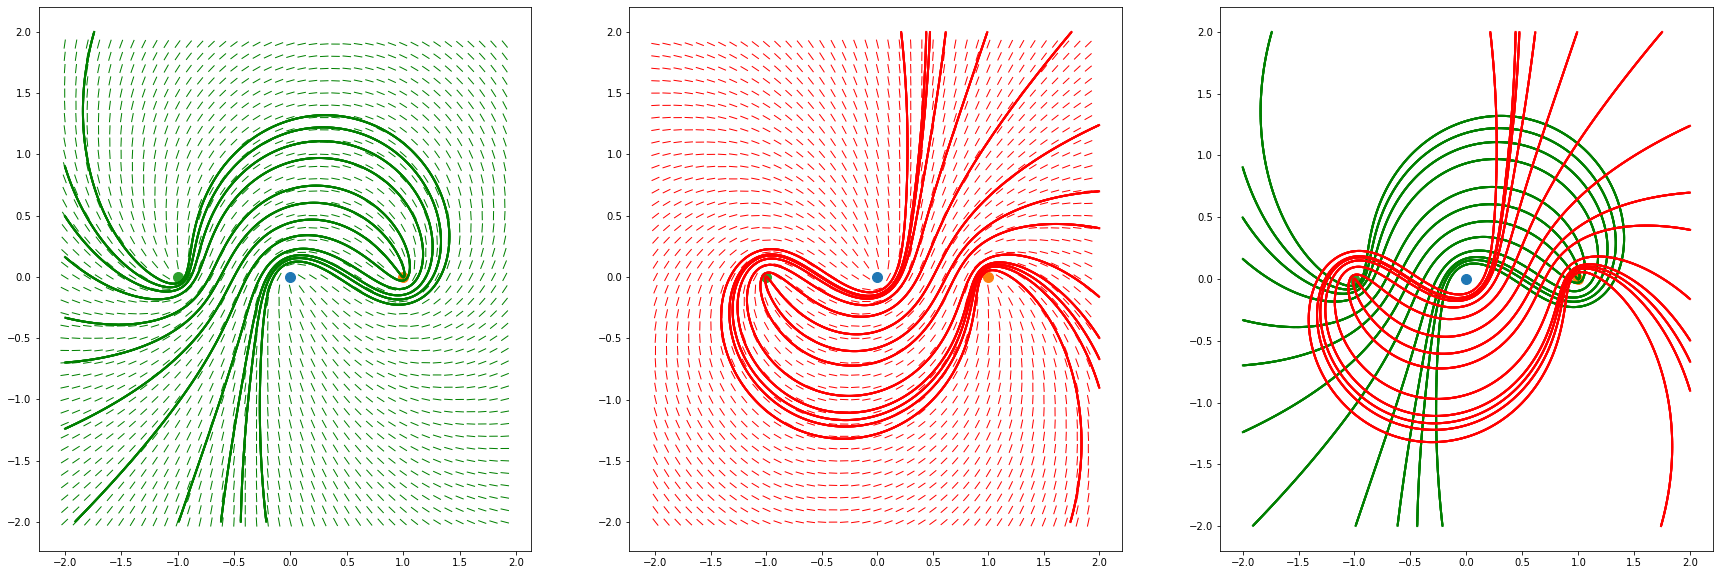

In [40]:
plot_teich(-1, rotate = cmath.exp(complex(0,math.pi/3)))

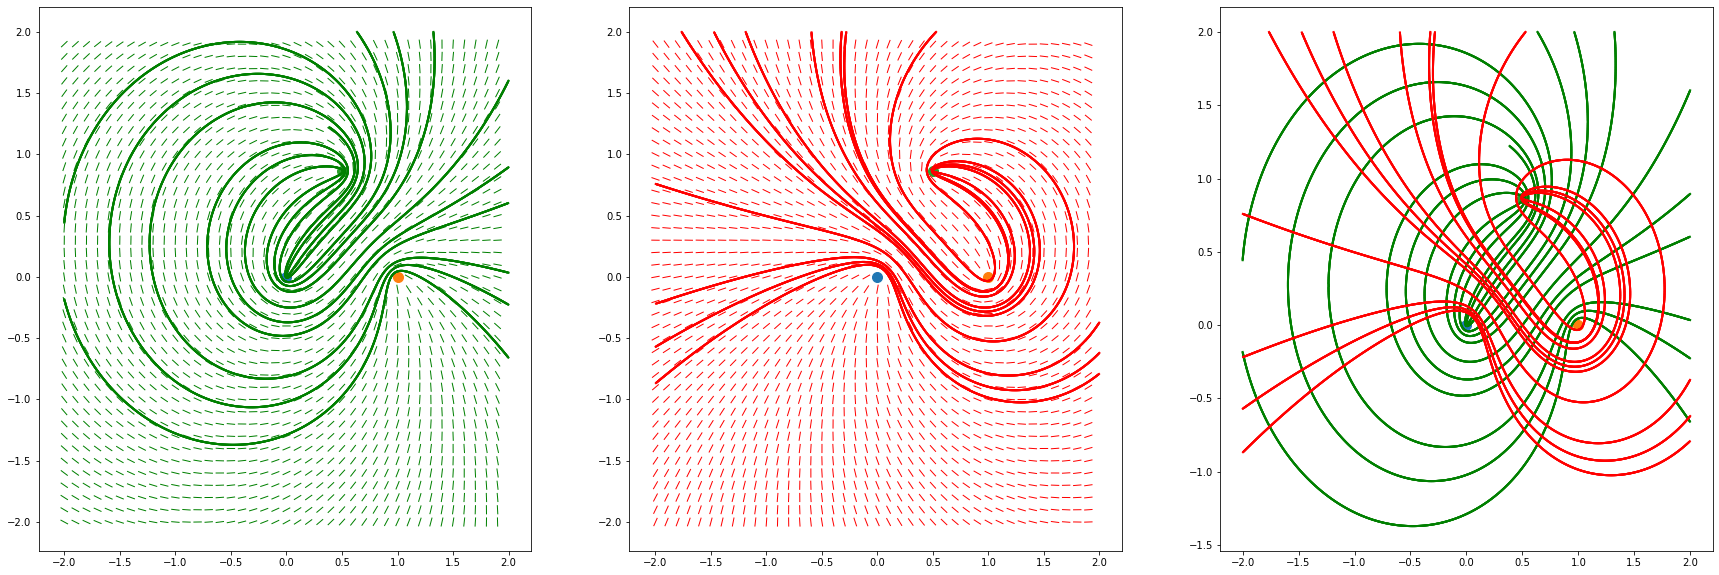

In [25]:
plot_teich(complex(1/2,math.sqrt(3)/2))

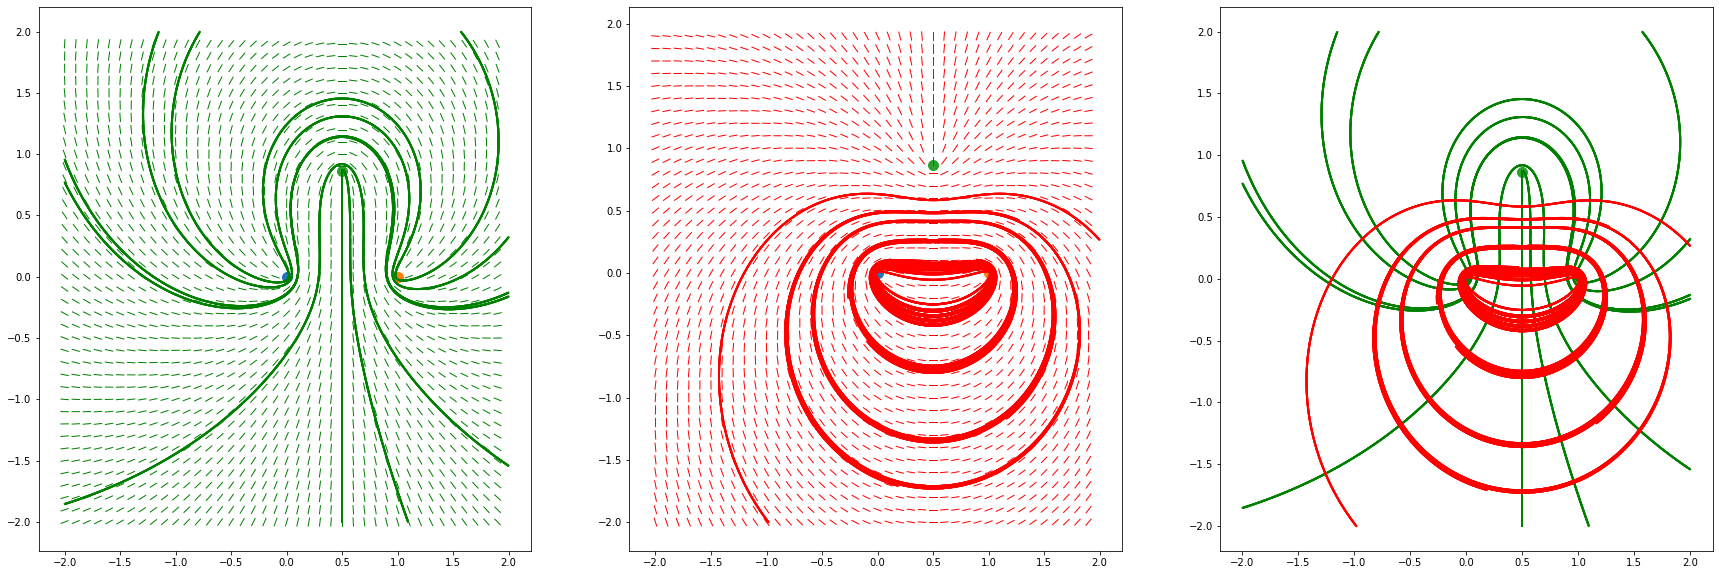

In [26]:
plot_teich(complex(1/2,math.sqrt(3)/2),rotate=cmath.exp(complex(0,math.pi/4)))

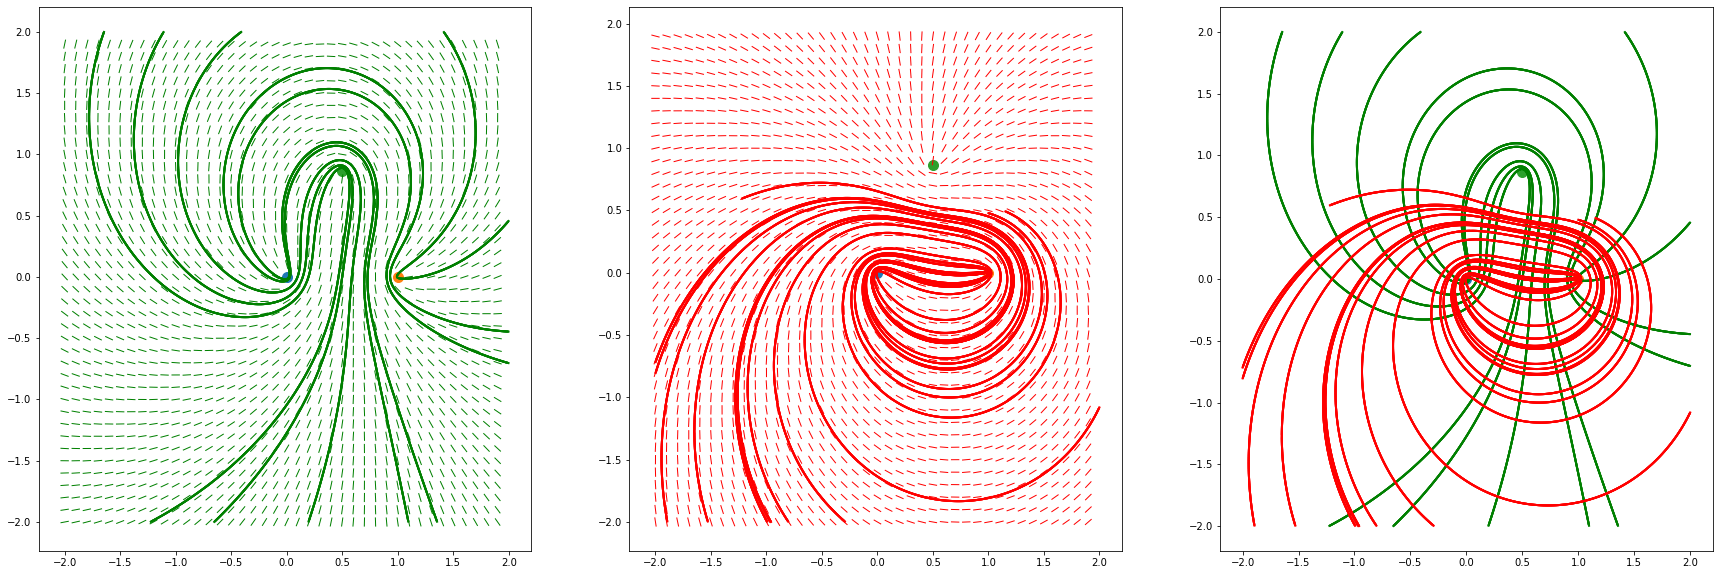

In [39]:
plot_teich(complex(1/2,math.sqrt(3)/2),rotate=cmath.exp(complex(0,math.pi/5)))